# Importing the libraries

In [1]:
import cv2
import os
from tqdm import tqdm
import numpy as np

# path of the image dataset

In [2]:
img_dir = 'images'
print(os.listdir(img_dir))

['Blue', 'Green', 'red']


# making the dataset along with their respective labels

In [3]:
dataset = []
for i in os.listdir(img_dir):
    path = os.path.join(img_dir,i)
#     print(path)
    for im in os.scandir(path):
        img = cv2.imread(im.path)
        img = cv2.resize(img,(224,224))
        dataset.append([img,i])

# Shuffling the dataset so that the model does not memorise

In [4]:
import random
random.shuffle(dataset)

# Splitting the images and labels for Training

In [5]:
x = []
y = []
for features,labels in dataset:
    x.append(features)
    y.append(labels)

In [6]:
y[:3]

['red', 'red', 'red']

# Transforming the labels to numeric value for calculations

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
x = np.array(x)

In [9]:
x.shape

(397, 224, 224, 3)

In [10]:
y.shape

(397,)

In [11]:
y = y.reshape(y.shape[0],1)

In [12]:
y.shape

(397, 1)

# Normalizing the RGB color of the image for better training

In [13]:
x = x/255.0

In [14]:
x[0]

array([[[0.10980392, 0.04705882, 0.95686275],
        [0.10980392, 0.04705882, 0.95686275],
        [0.10980392, 0.04705882, 0.95686275],
        ...,
        [0.09019608, 0.00784314, 0.84313725],
        [0.08627451, 0.00784314, 0.84313725],
        [0.08627451, 0.00784314, 0.84313725]],

       [[0.10980392, 0.04705882, 0.95686275],
        [0.10980392, 0.04705882, 0.95686275],
        [0.10980392, 0.04705882, 0.95686275],
        ...,
        [0.09019608, 0.01176471, 0.84705882],
        [0.09019608, 0.01176471, 0.84705882],
        [0.09019608, 0.01176471, 0.84705882]],

       [[0.10588235, 0.04313725, 0.95294118],
        [0.10588235, 0.04313725, 0.95294118],
        [0.10588235, 0.04313725, 0.95294118],
        ...,
        [0.10196078, 0.02352941, 0.85882353],
        [0.10196078, 0.02352941, 0.85882353],
        [0.10196078, 0.02352941, 0.85882353]],

       ...,

       [[0.00392157, 0.        , 0.8745098 ],
        [0.00392157, 0.        , 0.8745098 ],
        [0.00392157, 0

In [15]:
x.shape

(397, 224, 224, 3)

# Importing the tensorflow libraries for making and training model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [21]:
model = Sequential([Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    Dropout(0.2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    Dropout(0.2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D((2,2)),
                    Dropout(0.2),
                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(3,activation='softmax')
                   ])

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit(x,y,batch_size=32,epochs=10,validation_split=0.2)

Train on 317 samples, validate on 80 samples
Epoch 1/10
317/317 [==============================] - 15s 48ms/sample - loss: 0.6452 - accuracy: 0.7729 - val_loss: 0.1012 - val_accuracy: 0.9750
Epoch 2/10
317/317 [==============================] - 15s 48ms/sample - loss: 0.1346 - accuracy: 0.9590 - val_loss: 0.1687 - val_accuracy: 0.9500
Epoch 3/10
317/317 [==============================] - 15s 48ms/sample - loss: 0.1499 - accuracy: 0.9716 - val_loss: 0.1158 - val_accuracy: 0.9375
Epoch 4/10
317/317 [==============================] - 15s 48ms/sample - loss: 0.0718 - accuracy: 0.9716 - val_loss: 0.1563 - val_accuracy: 0.9875
Epoch 5/10
317/317 [==============================] - 15s 48ms/sample - loss: 0.0476 - accuracy: 0.9874 - val_loss: 0.0770 - val_accuracy: 0.9875
Epoch 6/10
317/317 [==============================] - 15s 47ms/sample - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0495 - val_accuracy: 0.9750
Epoch 7/10
317/317 [==============================] - 15s 48ms/sample - loss: 0

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)       

# Saving the model in the current working directory

In [25]:
model.save('trained_model.h5')

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Visualise the result

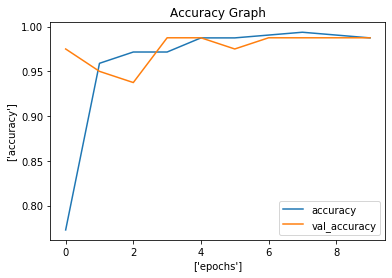

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel(['epochs'])
plt.ylabel(['accuracy'])
plt.title('Accuracy Graph')
plt.legend(['accuracy','val_accuracy'])

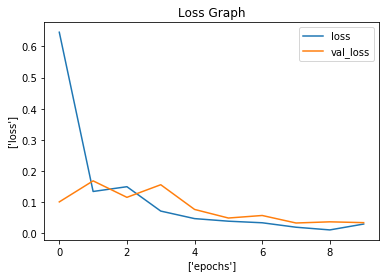

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel(['epochs'])
plt.ylabel(['loss'])
plt.title('Loss Graph')
plt.legend(['loss','val_loss'])